## Homework 1 by Yan Liu

In [1]:
# Import libraries

import nltk
#nltk.download('udhr')
#nltk.download('inaugural')
from nltk.corpus import udhr
from nltk.corpus import inaugural
from nltk.corpus import wordnet as wn
import matplotlib as pltlib
pltlib.rcParams['figure.dpi'] = 900
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import pandas as pd
import itertools
%matplotlib inline

#this library is used for splitting to training and validation set
from sklearn.model_selection import train_test_split

#to encode the class label in one hot encoded style
from sklearn.preprocessing import OneHotEncoder

#model architecture library
from keras.models import Sequential
from keras import layers

#for the optimization 
from keras.optimizers import RMSprop,Adam,SGD
#for adding layers
from keras.layers import Dense, Activation, Dropout
#from keras.callbacks import ModelCheckpoint

#for encoding in one hot encoded style
from keras.utils import to_categorical

import random
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


### Problem 1

Use the text of the Universal Declaration of Human Rights (UDHR). Create a table for 4 languages of your choice. Use that table to collect statistics about those languages. Place in that table the number of words in UDHR in each language, number of unique words, average length of words, number of sentences contained in UDHR and average number of words per sentence. You do not have to populate the table from your code. You may, but you may also determine individual values separately and enter them in the table manually.  Create a distribution of sentence lengths for all four language. Distribution of sentence lengths presents the number of sentences of varying length. Plot those (non-cumulative) distributions for all four languages using one diagram. 
(25%)


In [2]:
# Select four languages
languages = ['French_Francais', 'English', 'German_Deutsch','Spanish']
num_words = [len(udhr.words(lang + '-Latin1')) for lang in languages]
num_unique_words = [len(set(udhr.words(lang + '-Latin1'))) for lang in languages]
num_sents = [len(udhr.sents(lang + '-Latin1')) for lang in languages]

In [3]:
avg_word_len = [round(sum([len(w) for w in udhr.words("English" + '-Latin1')])/num_word,3) for lang,num_word in zip(languages, num_words)]

In [4]:
avg_unique_word_len = [round(sum([len(w) for w in set(udhr.words("English" + '-Latin1'))])/num_word,3) for lang,num_word in zip(languages, num_unique_words)]

In [5]:
avg_word_per_sent = []
for lang in languages: 
    avg_word_per_sent.append(len(sent) for sent in udhr.sents(lang + '-Latin1'))

In [6]:
words_cnt_per_sent = {}
avg_word_per_sent = []

for lang in languages:
    sents = udhr.sents(lang + '-Latin1') 
    words_cnt_per_sent[lang] = [len(sent) for sent in sents]
    avg_word_per_sent.append(round(sum(words_cnt_per_sent[lang])/len(sents),3))
    

In [7]:
# Create a data frame to showcase the results
table = pd.DataFrame({
                     "Lanugages" : languages,
                     "Number of Words" :num_words,
                     "Number of Unique Words" : num_unique_words,
                     "Average Length of Words" : avg_word_len,
                     "Number of Sentences" :  num_sents,
                     "Average Number of Words per Sentence" : avg_word_per_sent
                     })

In [8]:
table

,Lanugages,Number of Words,Number of Unique Words,Average Length of Words,Number of Sentences,Average Number of Words per Sentence
0,French_Francais,1935,567,4.274,57,33.947
1,English,1781,533,4.644,67,26.582
2,German_Deutsch,1521,579,5.438,60,25.350
3,Spanish,1763,542,4.691,58,30.397


Create a distribution of sentence lengths for all four language. Distribution of sentence lengths presents the number of sentences of varying length. Plot those (non-cumulative) distributions for all four languages using one diagram.

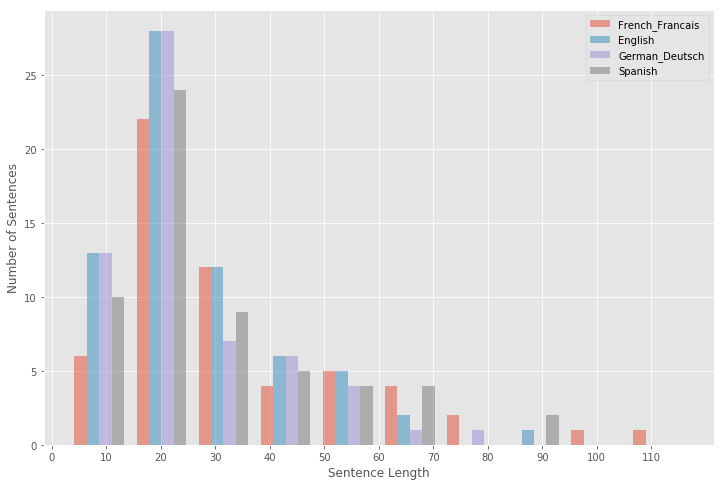

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(list(words_cnt_per_sent.values()), alpha = .5, bins = 10, label = languages)
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.legend(loc='upper right')
ax.set_xticks(range(0,120,10))
plt.show()


#### In general, the distribution of sentence length is approximately the same for the selected four lanugages. All the four languages have most sentences of length 10 to 20. French tends to be verbose as it has 1 or more sentences whose length fall into the [100,110] interval.

### Problem 2. 

Identify 10 most frequently used words longer than 7 characters in the entire corpus of Inaugural Addresses. Do not identify 10 words for every speech but rather 10 words for the entire corpus. Which among those words has the largest number of synonyms? List all synonyms for those 10 words. Which one of those 10 words has the largest number of hyponyms? List all hyponyms of those 10 most frequently used “long” words. The purpose of this problem is to familiarize you with WordNet and concepts of synonyms and hyponyms.
(25%)


In [10]:
# Load and concat all inaugurals words
inaugurals = [inaugural.words(fileid) for fileid in inaugural.fileids()]
concat_words = list(itertools.chain.from_iterable(inaugurals))

#### 10 most frequently used words longer than 7 characters

In [11]:
wordsDist = nltk.FreqDist(w.lower() for w in concat_words if len(w) > 7)

In [12]:
wordsDist.most_common(10)

[('government', 600),
 ('citizens', 247),
 ('constitution', 206),
 ('american', 163),
 ('national', 157),
 ('congress', 130),
 ('interests', 115),
 ('political', 106),
 ('executive', 97),
 ('principles', 96)]

In [13]:
# Create a dictionary with the 10 words as keys and their synonym list as values
words10 = [t[0] for t in wordsDist.most_common(10)]
word_synonym = {}
for w in words10:
    synonyms = []
    for synset in wn.synsets(w):
        for lemma_name in synset.lemma_names():
            if lemma_name not in synonyms:
                synonyms.append(lemma_name)
    word_synonym[w] = synonyms

#### List all synonyms for those 10 words

In [14]:
word_synonym

{'government': ['government',
  'authorities',
  'regime',
  'governing',
  'governance',
  'government_activity',
  'administration',
  'politics',
  'political_science'],
 'citizens': ['citizen'],
 'constitution': ['fundamental_law',
  'organic_law',
  'constitution',
  'establishment',
  'formation',
  'organization',
  'organisation',
  'United_States_Constitution',
  'U.S._Constitution',
  'US_Constitution',
  'Constitution',
  'Constitution_of_the_United_States',
  'composition',
  'physical_composition',
  'makeup',
  'make-up',
  'Old_Ironsides'],
 'american': ['American', 'American_English', 'American_language'],
 'national': ['national', 'subject', 'home', 'interior', 'internal'],
 'congress': ['Congress',
  'United_States_Congress',
  'U.S._Congress',
  'US_Congress',
  'congress',
  'sexual_intercourse',
  'intercourse',
  'sex_act',
  'copulation',
  'coitus',
  'coition',
  'sexual_congress',
  'sexual_relation',
  'relation',
  'carnal_knowledge'],
 'interests': ['intere

#### Words has the largest number of synonyms - constitution

In [15]:
sorted([(k,len(v)) for k,v in word_synonym.items()], key=lambda x: x[1], reverse = True)

[('constitution', 17),
 ('congress', 15),
 ('interests', 12),
 ('government', 9),
 ('national', 5),
 ('principles', 4),
 ('american', 3),
 ('executive', 3),
 ('citizens', 1),
 ('political', 1)]

In [16]:
word_hyponym = {}
for w in words10:
    hyponyms = []
    for synset in wn.synsets(w):
        for lemma_name in synset.hyponyms():
            if lemma_name not in hyponyms:
                hyponyms.append(lemma_name)
    word_hyponym[w] = hyponyms

#### List all hyponyms of those 10 most frequently used “long” words.

In [17]:
word_hyponym

{'government': [Synset('ancien_regime.n.01'),
  Synset('authoritarian_state.n.01'),
  Synset('bureaucracy.n.02'),
  Synset('court.n.03'),
  Synset('downing_street.n.02'),
  Synset('empire.n.02'),
  Synset('federal_government.n.01'),
  Synset('government-in-exile.n.01'),
  Synset('local_government.n.01'),
  Synset('military_government.n.01'),
  Synset('palace.n.02'),
  Synset('papacy.n.01'),
  Synset('puppet_government.n.01'),
  Synset('state.n.03'),
  Synset('state_government.n.01'),
  Synset('totalitarian_state.n.01'),
  Synset('legislation.n.02'),
  Synset('misgovernment.n.01'),
  Synset('trust_busting.n.01'),
  Synset('geopolitics.n.01'),
  Synset('realpolitik.n.01')],
 'citizens': [Synset('active_citizen.n.01'),
  Synset('civilian.n.01'),
  Synset('freeman.n.01'),
  Synset('private_citizen.n.01'),
  Synset('repatriate.n.01'),
  Synset('thane.n.02'),
  Synset('voter.n.01')],
 'constitution': [Synset('collectivization.n.01'),
  Synset('colonization.n.01'),
  Synset('communization.n.0

#### The word that has the largest number of hyponyms - american

In [18]:
sorted([(k,len(v)) for k,v in word_hyponym.items()], key=lambda x: x[1], reverse = True)

[('american', 75),
 ('principles', 35),
 ('interests', 27),
 ('government', 21),
 ('executive', 15),
 ('constitution', 10),
 ('citizens', 7),
 ('congress', 6),
 ('national', 3),
 ('political', 0)]

### Problem 3. 

Consider 100 points along the straight line in (x,y) plane represented by the linear equation y = 0.3x + 0.2. Distribute those points along the line uniformly in the interval between -2.0 and 3.0. To the y coordinate of each point add a random normally distributed value with standard deviation of 1 and mean 0. You have created and artificial set of random measurements. Create a shallow neural network with one layer which will be able to predict y value corresponding to any x value in the above interval. Implement and train the network using Keras API. Report on the accuracy of your model. This is a rather trivial problem and you do not need neural networks to solve it. We are practicing Keras API.

In [19]:
random.seed(100)
# Generate data points, use 1000 data points instead of 100 for higher accuracy
num_points=1000
x = np.linspace(-2,3,num_points)
# Add noise, scale is changed to 0.1 to lower noise
noise = np.random.normal(loc=0.0, scale=0.1, size=num_points)
y = 0.3*x + 0.2 + noise

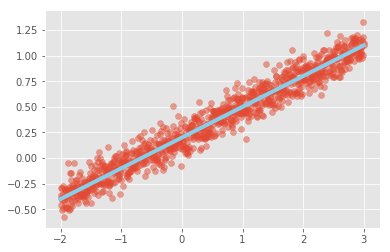

In [20]:
# Take a look
plt.scatter(x,y,alpha =.5)
plt.plot(x,0.3*x + 0.2, color = "skyblue", linewidth = 4)

In [21]:
# MODEL IS BUILD HERE
# 1 LAYER SIMPLE NEURAL NETWORK
#############################################

#we add the layers in sequential form
one_model = Sequential()

#first hidden layer with 20 neurons
one_model.add(Dense(20, input_shape=(1,)))

#relu nonlinear activation function is chosen
one_model.add(Activation('linear'))

#output layer
one_model.add(Dense(1))

#Use a linear activation function is chosen
one_model.add(Activation('linear'))

#show the whole model architecture          
one_model.summary()
############################################




W0703 20:45:04.566598 4420482496 deprecation_wrapper.py:119] From /anaconda3/envs/pytf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 20:45:04.580107 4420482496 deprecation_wrapper.py:119] From /anaconda3/envs/pytf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 20:45:04.583147 4420482496 deprecation_wrapper.py:119] From /anaconda3/envs/pytf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                40        
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [22]:
#split the data into training and validation set with 80%, 20% respectively
#x_coordinates = np.stack((x, y1), axis=-1)
#y_coordinates = np.stack()
train_x1, val_x1, train_y1, val_y1 = train_test_split(x,y, test_size=0.2, random_state=42,shuffle=True)

print(x.shape)
print(train_x1.shape)
print(y.shape)
print(train_y1.shape)



(1000,)
(800,)
(1000,)
(800,)


#### Take a look at training dataset

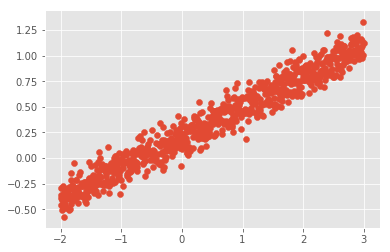

In [23]:
plt.scatter(train_x1, train_y1)

#### Take a look at validation dataset

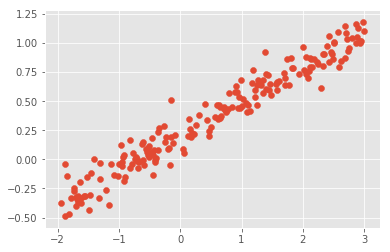

In [24]:
plt.scatter(val_x1,val_y1)

In [25]:
#OPTIMIZATION PARAMETERS ARE CONFIGURED HERE. THE MODEL IS TRAINED ALSO
#############################################

#Adam optimize is chosen
#loss function is chosen as mean squared error as it's a regression problem
#we want also show the results in accurucy results 

one_model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae'])

#train the model
history = one_model.fit(train_x1,train_y1,
                    batch_size=128,
                    epochs=10,
                    validation_data=(val_x1, val_y1))

W0703 20:45:05.003534 4420482496 deprecation_wrapper.py:119] From /anaconda3/envs/pytf/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0703 20:45:05.095470 4420482496 deprecation_wrapper.py:119] From /anaconda3/envs/pytf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0703 20:45:05.144549 4420482496 deprecation_wrapper.py:119] From /anaconda3/envs/pytf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 190us/step - loss: 0.8274 - mean_absolute_error: 0.7549 - val_loss: 0.7009 - val_mean_absolute_error: 0.6911
Epoch 2/10
800/800 [==============================] - 0s 12us/step - loss: 0.6191 - mean_absolute_error: 0.6528 - val_loss: 0.5107 - val_mean_absolute_error: 0.5911
Epoch 3/10
800/800 [==============================] - 0s 11us/step - loss: 0.4447 - mean_absolute_error: 0.5535 - val_loss: 0.3575 - val_mean_absolute_error: 0.4961
Epoch 4/10
800/800 [==============================] - 0s 10us/step - loss: 0.3075 - mean_absolute_error: 0.4599 - val_loss: 0.2400 - val_mean_absolute_error: 0.4081
Epoch 5/10
800/800 [==============================] - 0s 11us/step - loss: 0.2046 - mean_absolute_error: 0.3755 - val_loss: 0.1547 - val_mean_absolute_error: 0.3288
Epoch 6/10
800/800 [==============================] - 0s 11us/step - loss: 0.1298 - mean_absolute_error: 0.2992 - val_loss: 0.09

In [26]:
pred_y1= one_model.predict(val_x1)

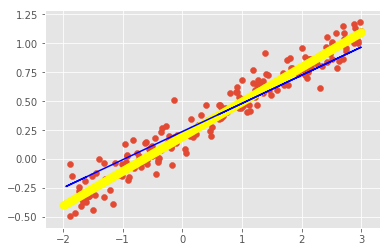

In [27]:
plt.plot(val_x1,pred_y1,'blue')
plt.scatter(val_x1,val_y1)
plt.scatter(x, 0.3*x+0.2, color = "yellow", linewidth = 2,alpha = .5)

#### Both the model history and the plot above shows that the model performs well. The blue line is created with the validation data set and predicted value on the validation dataset.  The red points are noisy validation data. The yellow line is the true equation without adding noise. The blue line and the yellow line almost overlaps, indicating good fitted results.

### Problem 4. 

Consider three points in (x,y) plane with coordinates (-2,0), (0,1.7) and (2.1,0). Around each of those three centers create a cloud of 100 randomly generated points. For the radial distance of any one of those points from its center use a random normal distribution.  For the angular coordinate of any one of “cloud” points use the uniform distribution. Once you have generated all three sets of cloud points plot them in the same diagram using three different colors. There should exist some overlap between the clouds. Create a two-layer neural network. Use Keras API. Fit a model that could predict whether a randomly generated point in the plane belongs to cloud 1, centered around (-2,0), cloud 2, centered around (0,1.7) or cloud 3, centered around (2.1,0). You can make that prediction in a much simpler way, however, we are practicing Keras API.

In [28]:
# Generate random data points
random.seed(1024)

#this is the number of points in each cloud
cloud_points=100

#the center of the clouds are:
center1 = [-2, 0]
center2 = [0, 1.7]
center3 = [2.1, 0]

# Sample 100 'r' from normal distribution and 100 'theta' from uniform distribution of 0 and 2*pi. 
# Then, create 100 points in Cartesian Coordinate System

# radial and angular parameters
mean = 0
sigma = 1.5
low = 0
high = 2*np.pi

#cloud samples for the cloud 1
r1=np.random.normal(mean, sigma, cloud_points)
theta1 = np.random.uniform(low, high, cloud_points)
#cloud samples for the cloud 2
r2=np.random.normal(mean, sigma,cloud_points)
theta2 = np.random.uniform(low,high, cloud_points)
#cloud samples for the cloud 3
r3=np.random.normal(mean, sigma, cloud_points)
theta3 = np.random.uniform(low,high, cloud_points)

# calculate x and y
x1 = center1[0] + r1*np.cos(theta1)
y1 = center1[1]+ r1*np.sin(theta1)
x2 = center2[0] + r2*np.cos(theta2)
y2 = center2[1]+ r2*np.sin(theta2)
x3 = center3[0] + r3*np.cos(theta3)
y3 = center3[1]+ r3*np.sin(theta3)

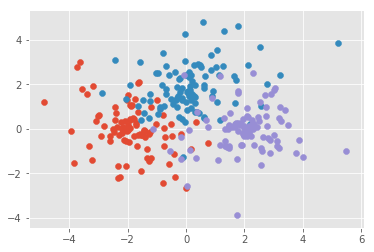

In [29]:
#visualize the clouds in 2-dimensional plot
#cloud 1 
plt.scatter(x1,y1)
#cloud 2 
plt.scatter(x2,y2)
#cloud 3 
plt.scatter(x3,y3)


#plot them
plt.show()

#### There're overlapped points indeed, good to go.

In [30]:
#class labels for each cloud point (without using one hot encoding)
Y1 = np.tile(np.array([1,0,0]), (100,1))
Y2 = np.tile(np.array([0,1,0]), (100,1))
Y3 = np.tile(np.array([0,0,1]), (100,1))

In [31]:
# Stack coordinates
X1 = np.stack((x1, y1), axis=-1)
X2 = np.stack((x2, y2), axis=-1)
X3 = np.stack((x3, y3), axis=-1)

In [32]:
#perform one aggregated input tensor
X=np.concatenate([X1,X2,X3],axis=0)
#perform one aggregated output tensor
Y=np.vstack([Y1,Y2,Y3])

In [33]:
#split the data into training and validation set with 80%, 20% respectively
train_x, val_x, train_y, val_y = train_test_split( X,Y, test_size=0.2, random_state=42,shuffle=True)

print(X.shape)
print(train_x.shape)
print(Y.shape)
print(train_y.shape)


(300, 2)
(240, 2)
(300, 3)
(240, 3)


In [34]:
# MODEL IS BUILD HERE
# 2 LAYER SIMPLE NEURAL NETWORK
#############################################

#we add the layers in sequential form
model = Sequential()

#first hidden layer with 50 neurons, 2-D coordinates
model.add(Dense(50, input_shape=(2,)))

#relu nonlinear activation function is chosen
model.add(Activation('relu'))

#second hidden layer with 50 neurons
model.add(Dense(50))

#relu nonlinear activation function is chosen
model.add(Activation('relu'))

#output layer - 3 Classes
model.add(Dense(3))

#softmax nonlinear activation function is chosen
model.add(Activation('softmax'))

#show the whole model architecture          
model.summary()
############################################



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                150       
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 153       
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 2,853
Trainable params: 2,853
Non-trainable params: 0
_________________________________________________________________


In [35]:
#OPTIMIZATION PARAMETERS ARE CONFIGURED HERE. THE MODEL IS TRAINED ALSO
#############################################

#Adam optimize is chosen
#loss function is chosen as categorical_crossentropy
#we want also show the results in accurucy results 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
history = model.fit(train_x,train_y,
                    batch_size=32,
                    epochs=5,
                    shuffle=True,
                    verbose=1,
                    validation_data=(val_x, val_y))

W0703 20:45:05.974200 4420482496 deprecation.py:323] From /anaconda3/envs/pytf/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 240 samples, validate on 60 samples
Epoch 1/5
240/240 [==============================] - 0s 911us/step - loss: 0.9528 - acc: 0.6167 - val_loss: 0.8395 - val_acc: 0.7667
Epoch 2/5
240/240 [==============================] - 0s 50us/step - loss: 0.8300 - acc: 0.7417 - val_loss: 0.7355 - val_acc: 0.8833
Epoch 3/5
240/240 [==============================] - 0s 48us/step - loss: 0.7301 - acc: 0.8333 - val_loss: 0.6514 - val_acc: 0.8833
Epoch 4/5
240/240 [==============================] - 0s 37us/step - loss: 0.6422 - acc: 0.8542 - val_loss: 0.5816 - val_acc: 0.9000
Epoch 5/5
240/240 [==============================] - 0s 37us/step - loss: 0.5634 - acc: 0.8500 - val_loss: 0.5236 - val_acc: 0.9000


In [36]:
#Plot the results for training and validation loss

#history object preserves the loss value
loss = history.history['loss']
#history object preserves the validation loss value
val_loss = history.history['val_loss']

#number of epochs
epochs = range(len(loss))

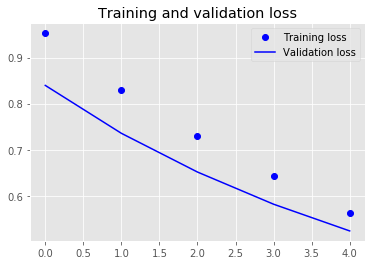

In [37]:
plt.figure()

#training loss
plt.plot(epochs, loss, 'bo', label='Training loss')
#validation loss
plt.plot(epochs, val_loss, 'b', label='Validation loss')
#we add title
plt.title('Training and validation loss')

#we add legends
plt.legend()
#finally plot
plt.show()

In [38]:
# Get predicted probabilities on validationd dataset
model.predict(val_x)

array([[0.08129957, 0.17736168, 0.74133873],
       [0.0175263 , 0.09106655, 0.89140713],
       [0.19076309, 0.5063516 , 0.30288532],
       [0.7101119 , 0.14902218, 0.14086589],
       [0.08692342, 0.20461358, 0.708463  ],
       [0.01132054, 0.03754558, 0.9511339 ],
       [0.1683254 , 0.5831497 , 0.24852496],
       [0.04859041, 0.715731  , 0.23567861],
       [0.39421362, 0.30444792, 0.30133846],
       [0.09594262, 0.59874636, 0.305311  ],
       [0.04229525, 0.1325705 , 0.8251343 ],
       [0.58222026, 0.33212817, 0.08565158],
       [0.0817403 , 0.1972817 , 0.720978  ],
       [0.7910409 , 0.13845704, 0.07050208],
       [0.27988616, 0.56508327, 0.15503052],
       [0.09930132, 0.54909414, 0.3516045 ],
       [0.38416493, 0.29676425, 0.3190708 ],
       [0.03609566, 0.10026156, 0.86364275],
       [0.0386355 , 0.16934583, 0.79201865],
       [0.33161545, 0.40688875, 0.26149583],
       [0.7421251 , 0.1809459 , 0.07692907],
       [0.19284654, 0.5108111 , 0.2963423 ],
       [0.

In [39]:
# Get predicted classes on validationd dataset

model.predict_classes(val_x)

array([2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0])

#### Combined with the probabilities above, cloud 1 is represented by 0, cloud 2 is represented by 1, cloud 3 is represented by 2

In [40]:
# Generate new data in cloud 1, around center 1 
random.seed(1023)
#cloud samples for the cloud 1
r1_new=np.random.normal(mean, sigma, cloud_points)
theta1_new = np.random.uniform(low, high, cloud_points)
# calculate x and y
x1_new = center1[0] + r1_new*np.cos(theta1)
y1_new = center1[1]+ r1_new*np.sin(theta1)
X1_new = np.stack((x1_new, y1_new), axis=-1)

In [41]:
model.predict_classes(X1_new)

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0])

#### The result on the new data is pretty good as most of the entries are 0 or cloud 1.